In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from influxdb import *
import datetime


In [2]:
INFLUX_DB_IP = '10.12.97.178'
INFLUX_DB_PORT = 8086
INFLUX_DB = 'demoDb'
TARGET_MEASUREMENT = 'EM_live'

In [3]:
con_obj = InfluxDBClient(host=INFLUX_DB_IP, port=INFLUX_DB_PORT, database=INFLUX_DB)
query = 'select * from ' + TARGET_MEASUREMENT + ' where time > now() - 2d '
df = pd.DataFrame(con_obj.query(query, chunked=True, chunk_size=10000).get_points())
df['time'] = df['time'].astype('datetime64[ns]')

df.head()

,time,DeviceID,EM_Active Power (kW),EM_Current Avg (A),EM_Current Ph1 (A),EM_Current Ph2 (A),EM_Current Ph3 (A),EM_Energy (kWh),EM_Frequency (Hz),EM_Power Factor,...,EM_Voltage Ph2-Ph3 (V),EM_Voltage Ph3-N (V),Mean_THD,SCS,imbalance_current,imbalance_volt,mean_current,mean_volt,mean_voltage,temp_rise
0,2020-06-17 05:57:02.641190912,EM10,55308.0,137.2,147.8,135.5,128.2,137049.2,50.0,0.8,...,410.3,235.1,0.000000,1,7.752126,0.292184,137.166667,410.700000,236.900000,0.170743
1,2020-06-17 05:57:03.084325120,EM6,0.0,0.0,0.1,0.0,0.1,269097.1,50.0,0.0,...,393.6,227.5,0.000000,0,50.000000,0.194915,0.066667,393.333333,227.100000,0.075984
2,2020-06-17 05:57:03.105313024,EM9,80.1,133.6,133.2,135.1,132.4,32171.5,50.0,0.8,...,391.2,225.8,0.000000,1,1.147991,0.222032,133.566667,390.333333,225.333333,0.098597
3,2020-06-17 05:57:03.391980032,EM22,0.0,0.0,0.0,0.0,0.0,44203.4,50.0,0.0,...,391.2,226.5,0.000000,0,0.000000,0.323349,0.000000,391.733333,226.166667,0.209109
4,2020-06-17 05:57:04.148231936,EM5,281.9,469.2,494.0,442.5,471.0,257248.0,50.0,0.8,...,392.9,227.1,6.233333,1,5.293073,0.067848,469.166667,393.033333,226.900000,0.009207


In [29]:
df1 = df[ (df['time'] >= '2020-06-18 00:00:00.000000000') & (df['time'] < '2020-06-19 00:00:00.000000000') ]
df1=df1[df1['DeviceID']=='EM4']
#df1 = df1[['time', 'EM_TOTAL_Import_Energy(kWh)','DeviceID']]
df1=df1.set_index('time')

In [30]:
df1['diff']=df1.index.to_series().diff().dt.total_seconds().dropna()

In [31]:
df1['diff'].min()

0.630535936

In [32]:
df1['diff'].max()/60

8.158383829333333

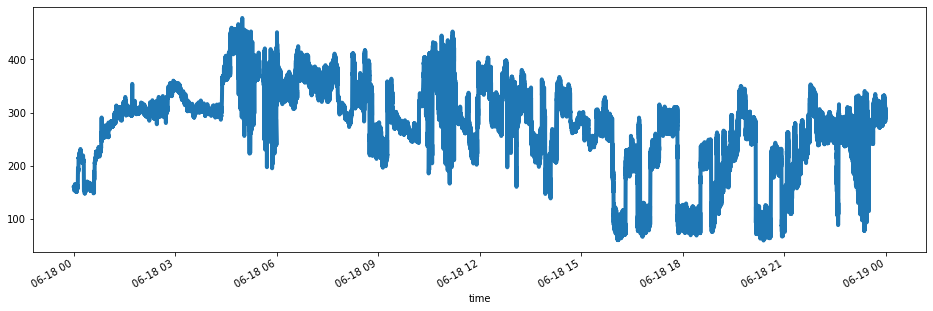

In [33]:
df1['EM_Active Power (kW)'].plot(figsize = (16,5),lw=4)